In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil

In [29]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 
                            1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

metab_file_grouping = pd.read_csv(r'..\data\metadata\metabolomics_file_grouping.csv')
tf = pd.read_excel(r'..\data\raw\metabolomics\20210904_KAO_Huishi_HILIC_Tracefinder_peakAreas.xlsx', index_col=0)
tf_metab_cols = tf.columns
########### IMPORTANT, REPLACING ZEROES WITH 1E3 for imputation ##################
tf = tf.replace(0, 100)
# tf = np.log2(tf)
# tf = tf.merge(metab_file_grouping[['bg_type', 'animal', 'week', 'qc_file', 'blank_file', 'quant_file', 'glucose_tolerance']],
#         left_on=tf.index, right_on=metab_file_grouping['File Name'])
# tf.T

,20210831_KAO_HILIC_ACN_20210831232610,20210831_KAO_HILIC_extraction_blank_1,20210831_KAO_HILIC_extraction_blank_1_20210901004002,20210831_KAO_HILIC_human_plasma_1,20210831_KAO_HILIC_human_plasma_2,20210831_KAO_HILIC_human_plasma_3,20210831_KAO_HILIC_human_plasma_4,20210831_KAO_HILIC_human_plasma_5,20210831_KAO_HILIC_T112M_20210330_8wk_RBG,20210831_KAO_HILIC_T193M20210406_9wk_RBG,...,20210831_KAO_HILIC_T1101M_20210330_8wk_RBG,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG,20210831_KAO_HILIC_T1101M_20210406_9wk_RBG,20210831_KAO_HILIC_T1101M_20210410_10wk_FBG,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,20210831_KAO_HILIC_T1102M_20210402_9wk_FBG,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG,20210831_KAO_HILIC_T1102M_20210410_10wk_FBG,20210831_KAO_HILIC_T1102M_20210413_10wk_RBG
Acetyl-L-carnitine,14.462583,6.643856,6.643856,23.686416,23.743475,23.831523,23.876334,23.859395,25.498127,25.798988,...,25.938916,26.701436,25.542558,26.505795,25.457849,26.560952,26.763656,25.534238,26.587256,25.253349
Adenosine 5'-monophosphate,17.743467,6.643856,6.643856,14.261192,15.172342,15.412971,15.055385,15.985389,19.683494,19.844683,...,19.710907,19.361426,18.934115,20.002580,19.354107,20.596883,19.870613,20.119298,19.839083,19.301138
Cytidine 5'-diphosphocholine,6.643856,6.643856,6.643856,13.465737,14.375473,14.626872,13.112462,13.185941,16.425055,16.757009,...,16.645271,16.553176,16.306181,16.000122,15.436833,16.349877,16.034273,16.611257,15.086548,16.375282
DL-Carnitine,6.643856,6.643856,6.643856,25.356828,25.369343,25.525401,25.643287,25.650636,25.369229,25.683466,...,24.883915,24.653365,25.204058,24.919609,24.729575,24.924531,24.605631,25.425618,25.049557,24.929619
DL-Glutamine,6.643856,13.591688,14.271473,27.560167,27.013679,27.067833,27.135967,27.287122,26.761291,26.953612,...,26.853428,26.714114,26.778173,26.910107,26.544384,27.075654,26.842405,26.921434,26.986625,26.624456
DL-Leucine/Isoleucine,14.350713,14.109690,14.336524,24.687778,25.541242,25.749622,25.848922,25.909875,26.766476,25.739644,...,26.408460,25.330626,26.580947,25.397558,26.136098,25.019891,24.577177,26.686066,24.942976,26.267609
DL-Lysine,6.643856,6.643856,6.643856,23.059102,23.133586,23.127030,23.199776,23.090328,23.946591,23.950302,...,23.701457,23.503826,23.939022,23.831842,24.017199,23.470821,23.475719,23.822511,23.458088,23.673574
DL-Proline,6.643856,6.643856,6.643856,24.304665,24.619087,24.747260,24.842558,24.885675,24.290260,24.092022,...,23.878904,23.095574,24.219619,23.369683,23.837918,23.374216,23.053641,24.233009,23.617551,23.821381
Glycine,6.643856,6.643856,6.643856,20.292663,19.616579,19.814024,19.762972,19.970765,20.856170,21.076191,...,20.829526,21.136012,20.818679,21.289730,20.711567,20.910210,20.722803,21.131673,21.223388,20.752802
Guanosine: all right MS2,6.643856,6.643856,6.643856,6.643856,6.643856,6.643856,6.643856,6.643856,18.863430,19.008608,...,19.616637,18.938780,19.545692,19.042334,19.540094,19.115792,18.630602,19.972513,18.940302,19.533341


Text(0.02, 0.5, 'log2 feature quant')

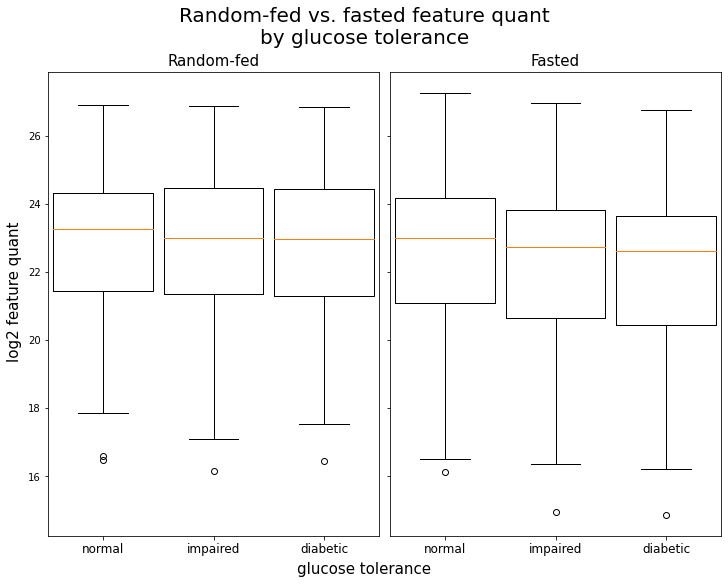

In [34]:
df = tf
# df[tf_metab_cols] = df[df['quant_file'] == True][tf_metab_cols]
df = df.T
# display(df)

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, constrained_layout=True)
fig.set_size_inches((10, 8))

for ax, bg_type in zip(axs, ['RBG', 'FBG']):
    for tol_type, position in zip(['normal', 'impaired', 'diabetic'], [1,2,3]):
        # Get filenames that match bg_type and tol_type
        cols = metab_file_grouping[(metab_file_grouping['bg_type'] == bg_type) & \
                             (metab_file_grouping['glucose_tolerance'] == tol_type) & \
                             (metab_file_grouping['quant_file'] == True)]['File Name']
#         display(df[cols])
        ax.boxplot(df[cols].mean(axis=1), positions=[position, ], widths=0.9)
        
        # Option for barplots, much slower to render though
#         ax.bar(position, df[cols].mean(axis=1))
        
    ax.set_title('Random-fed' if bg_type == 'RBG' else 'Fasted', fontsize=15)
    ax.set_xticks([1,2,3], )
    ax.set_xticklabels(['normal', 'impaired', 'diabetic'], fontsize=12)

fig.suptitle('Random-fed vs. fasted feature quant\nby glucose tolerance', fontsize=20)
fig.supxlabel('glucose tolerance', fontsize=15)
fig.supylabel('log2 feature quant', fontsize=15)